In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [26]:
#as the team name was changed making changes in the data for accurate anaylysis
deliveries = deliveries.replace('Deccan Chargers', 'Sunrisers Hyderabad')




In [27]:
deliveries.shape

(179078, 21)

In [10]:
matches = pd.read_csv('matches.csv')

#as hyderabad old team was named as Deccan chargers lets do the needful change
matches = matches.replace({'Deccan Chargers': 'Sunrisers Hyderabad'})

In [11]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals'],
      dtype=object)

# Q1. Who will win the match? (SRH / CSK)

In [12]:
#checking total matches played by RCB
matches_srh = matches[(matches['team1']=='Sunrisers Hyderabad')|(matches['team2']=='Sunrisers Hyderabad')]

wins_srh = np.sum(matches_srh.winner == 'Sunrisers Hyderabad')

print("Total matches played by SRH:", matches_srh.shape[0])
print("Total matches won by SRH:", wins_srh)
print("SRH winning percentage:", (wins_srh/matches_srh.shape[0]*100))

Total matches played by SRH: 183
Total matches won by SRH: 87
SRH winning percentage: 47.540983606557376


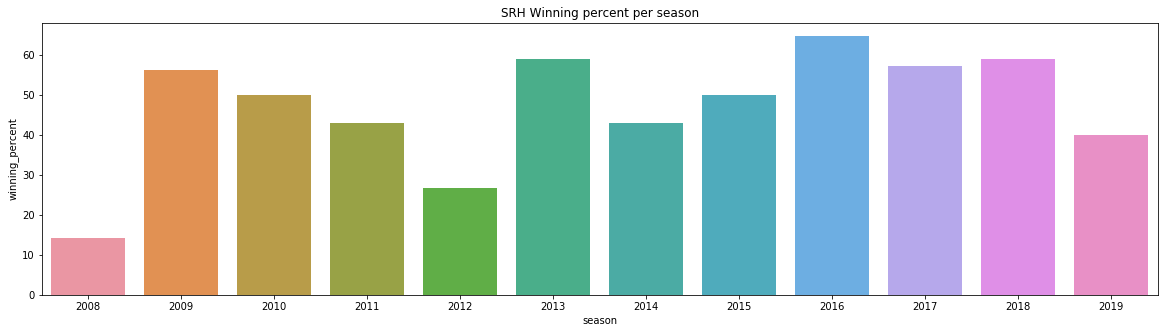

In [13]:
#checking RCB matches winning percentage per season

srh_wins = matches_srh[matches_srh.winner == 'Sunrisers Hyderabad']
# matches['season'].unique()
srh_season_wins = srh_wins.groupby('season')['winner'].count().reset_index()
srh_season_wins['total_matches_srh']=matches_srh.groupby('season')['id'].count().values
srh_season_wins['winning_percent']= (srh_season_wins.winner/srh_season_wins.total_matches_srh)*100

plt.figure(figsize=(20,5))
sns.barplot(x=srh_season_wins['season'], y = srh_season_wins['winning_percent'])
plt.title("SRH Winning percent per season")
plt.show()

In [14]:
#checking total matches played by KKR
matches_csk = matches[(matches['team1']=='Chennai Super Kings')|(matches['team2']=='Chennai Super Kings')]

wins_csk = np.sum(matches_csk.winner == 'Chennai Super Kings')

print("Total matches played by CSK:", matches_csk.shape[0])
print("Total matches won by CSK:", wins_csk)
print("CSK winning percentage:", (wins_csk/matches_csk.shape[0]*100))

Total matches played by CSK: 164
Total matches won by CSK: 100
CSK winning percentage: 60.97560975609756


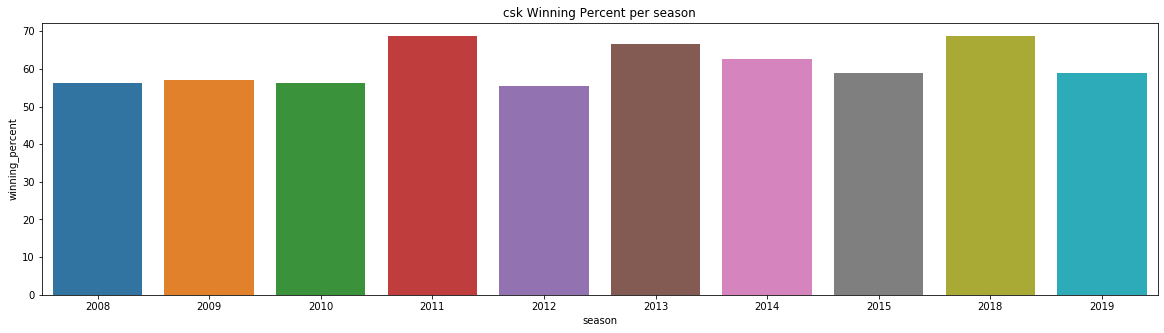

In [15]:
#checking Delhi Capitals matches winning percentage per season

csk_wins = matches_csk[matches_csk.winner == 'Chennai Super Kings']
# matches['season'].unique()
csk_season_wins = csk_wins.groupby('season')['winner'].count().reset_index()
csk_season_wins['total_matches_csk']=matches_csk.groupby('season')['id'].count().values
csk_season_wins['winning_percent']= (csk_season_wins.winner/csk_season_wins.total_matches_csk)*100

plt.figure(figsize=(20,5))
sns.barplot(x=csk_season_wins['season'], y = csk_season_wins['winning_percent'])
plt.title('csk Winning Percent per season')
plt.show()

In [18]:
#checking matches between 'SRH' and 'CSK'
matches_srh_csk = matches[((matches['team1']=='Sunrisers Hyderabad')&(matches['team2']=='Chennai Super Kings'))|((matches['team2']=='Sunrisers Hyderabad')&(matches['team1']=='Chennai Super Kings'))]
matches_srh_csk.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
84,85,2008,Chennai,2008-05-06,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,7,AC Gilchrist,"MA Chidambaram Stadium, Chepauk",MR Benson,RB Tiffin,NaN
113,114,2008,Hyderabad,2008-05-27,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,7,SK Raina,"Rajiv Gandhi International Stadium, Uppal",BG Jerling,AM Saheba,NaN
130,131,2009,Durban,2009-04-27,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,6,HH Gibbs,Kingsmead,IL Howell,TH Wijewardene,NaN
143,144,2009,East London,2009-05-04,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Chennai Super Kings,78,0,MS Dhoni,Buffalo Park,BR Doctrove,M Erasmus,NaN
178,179,2010,Chennai,2010-03-14,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,31,0,WPUJC Vaas,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN


season  winner             
2008    Chennai Super Kings     50.000000
        Sunrisers Hyderabad     50.000000
2009    Chennai Super Kings     50.000000
        Sunrisers Hyderabad     50.000000
2010    Sunrisers Hyderabad     66.666667
        Chennai Super Kings     33.333333
2011    Chennai Super Kings    100.000000
2012    Chennai Super Kings    100.000000
2013    Chennai Super Kings    100.000000
2014    Chennai Super Kings     50.000000
        Sunrisers Hyderabad     50.000000
2015    Chennai Super Kings     50.000000
        Sunrisers Hyderabad     50.000000
2018    Chennai Super Kings    100.000000
2019    Chennai Super Kings     50.000000
        Sunrisers Hyderabad     50.000000
Name: winner, dtype: float64

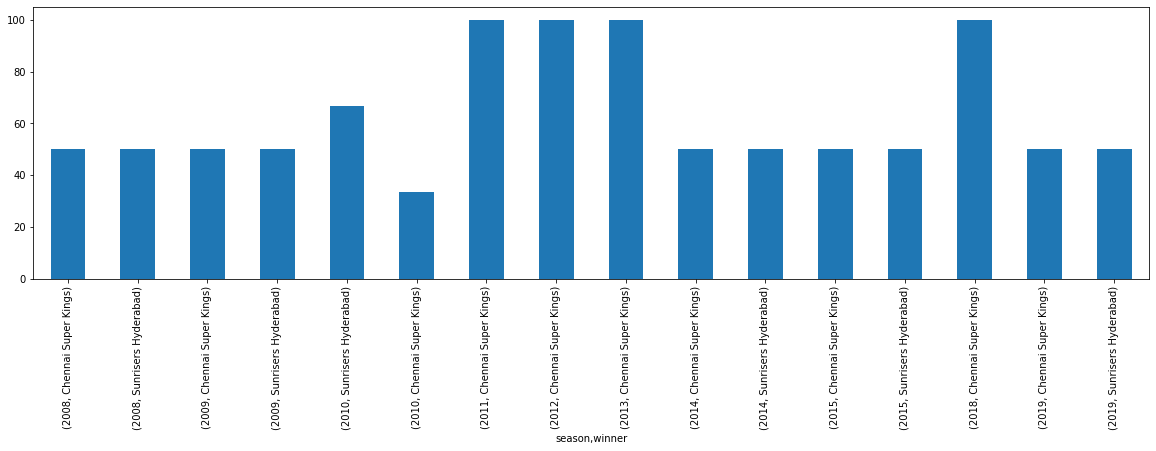

In [19]:
#Now lets see how srh has performed over csk
# matches_srh_csk = mat

res = matches_srh_csk.groupby('season')['winner'].value_counts(normalize=True)*100
display(res)

plt.figure(figsize=(20,5))
res.plot(kind='bar')
plt.show()

**Inference:**
    From the graphs above we can clearly see that CSK has a higher winning percentage than SRH mostly in all seasons also CSK has been very consistent in their per season and even overall

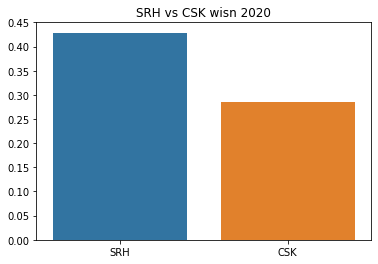

In [22]:
#2020 
win_2020_srh = 3/7
win_2020_csk = 2/7

win_2020_srh, win_2020_csk
plt.title("SRH vs CSK wisn 2020")
sns.barplot(['SRH', 'CSK'], [win_2020_srh, win_2020_csk])

## Q1 Solution:

###  Well usually SRH and CSK almost have been close every season however overally winning percentage is higher for Csk. But if we see 2020 performance CSK has not done good so far . so it is going to be a tough one

In [28]:
deliveries['wide_runs'].value_counts()

0    173673
1      4915
2       230
5       208
3        47
4         5
Name: wide_runs, dtype: int64

In [29]:
wide_bowls = deliveries[deliveries.wide_runs!=0]

#counting wide bowls during a match
wide_bowls.groupby('match_id')['ball'].count().head()

match_id
1     8
2     8
3     9
4    13
5     8
Name: ball, dtype: int64

In [31]:
#checking wide bowls only when SRH is playing
wb_srh = wide_bowls[(wide_bowls.batting_team=='Sunrisers Hyderabad')|(wide_bowls.bowling_team=='Sunrisers Hyderabad')]

wb_srh.groupby('match_id')['ball'].count().head()

match_id
1      8
6      3
10     6
14    10
19    10
Name: ball, dtype: int64

In [32]:
wb_srh_count = wb_srh.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Sunrisers Hyderabad in a match: {np.mean(wb_srh_count)}')
print(f'Median  wide bowls by Sunrisers Hyderabad in a match: {np.median(wb_srh_count)}')
print(f'Minimum  wide bowls by Sunrisers Hyderabad in a match: {np.min(wb_srh_count)}')
print(f'Maximum  wide bowls by Sunrisers Hyderabad in a match: {np.max(wb_srh_count)}')

Average wide bowls by Sunrisers Hyderabad in a match: 6.65934065934066
Median  wide bowls by Sunrisers Hyderabad in a match: 6.5
Minimum  wide bowls by Sunrisers Hyderabad in a match: 1
Maximum  wide bowls by Sunrisers Hyderabad in a match: 16


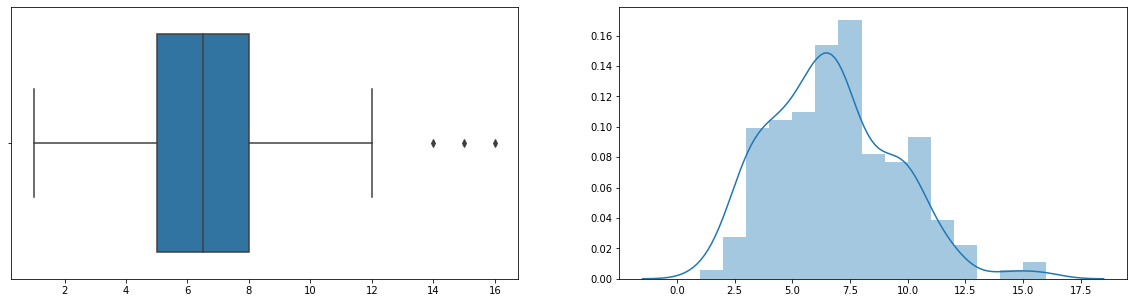

In [33]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(wb_srh_count, ax = ax[0])
sns.distplot(wb_srh_count, ax=ax[1])

In [34]:
#checking wide bowls only when DC is playing
wb_csk = wide_bowls[(wide_bowls.batting_team=='Chennai Super Kings')|(wide_bowls.bowling_team=='Chennai Super Kings')]

wb_csk.groupby('match_id')['ball'].count().head()

match_id
61     7
67    11
71     8
74     9
79     6
Name: ball, dtype: int64

In [35]:
wb_csk_count = wb_csk.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Chennai Super Kings in a match: {np.mean(wb_csk_count)}')
print(f'Median  wide bowls by Chennai Super Kings in a match: {np.median(wb_csk_count)}')
print(f'Minimum  wide bowls by Chennai Super Kings in a match: {np.min(wb_csk_count)}')
print(f'Maximum  wide bowls by Chennai Super Kings in a match: {np.max(wb_csk_count)}')

Average wide bowls by Chennai Super Kings in a match: 7.154320987654321
Median  wide bowls by Chennai Super Kings in a match: 7.0
Minimum  wide bowls by Chennai Super Kings in a match: 1
Maximum  wide bowls by Chennai Super Kings in a match: 18


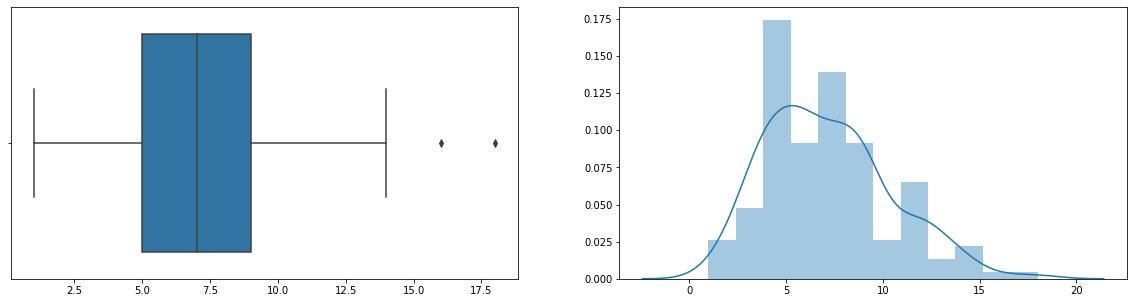

In [36]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(wb_csk_count, ax = ax[0])
sns.distplot(wb_csk_count, ax=ax[1])


In [37]:
#lets also check the matches played between srh and csk
wb_srh_csk = wide_bowls[((wide_bowls.batting_team=='Sunrisers Hyderabad')&(wide_bowls.bowling_team=='Chennai Super Kings'))|((wide_bowls.batting_team=='Chennai Super Kings')&(wide_bowls.bowling_team=='Sunrisers Hyderabad'))]

wb_srh_csk.groupby('match_id')['ball'].count()

match_id
85        6
114      14
131       7
144       6
179      12
216       9
232       5
272       5
313       9
352       4
414       7
435       9
474       3
507       3
521       8
551       7
7913      6
7939     11
7950     12
7953      9
11324     6
11332     5
Name: ball, dtype: int64

In [39]:
wb_srhcsk = wb_srh_csk.groupby('match_id')['ball'].count()

print(f'Average wide bowls in (SRH and CSK) match: {np.mean(wb_srhcsk)}')
print(f'Median  wide bowls in (SRH and CSK) match: {np.median(wb_srhcsk)}')
print(f'SRHnimum  wide bowls in (SRH and CSK) match: {np.min(wb_srhcsk)}')
print(f'Maximum  wide bowls in (SRH and CSK) match: {np.max(wb_srhcsk)}')

Average wide bowls in (SRH and CSK) match: 7.409090909090909
Median  wide bowls in (SRH and CSK) match: 7.0
SRHnimum  wide bowls in (SRH and CSK) match: 3
Maximum  wide bowls in (SRH and CSK) match: 14


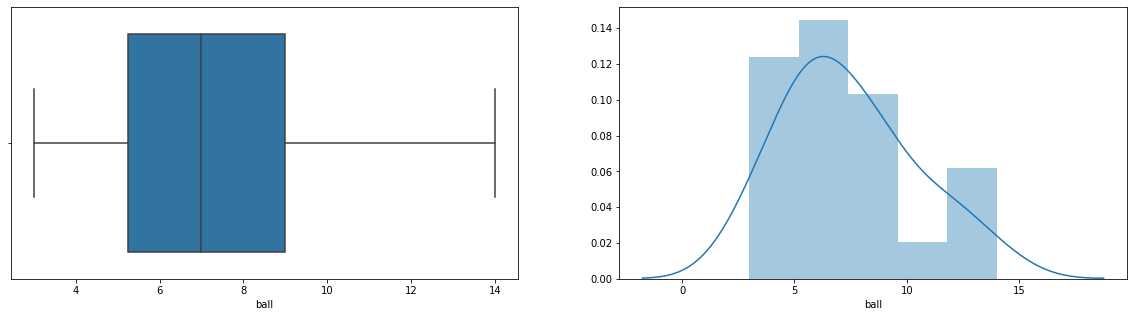

In [40]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(wb_srhcsk, ax = ax[0])
sns.distplot(wb_srhcsk, ax=ax[1])

**Inference:**
    So from all the plots and graphs above we have understood 
        - SRH on an average has around 6 wide bowls in a match
        - CSK on an average has around 7 wide bowls in a match
        - we also checked SRH - CSK match, an average we can say they might have 6-8 wide bowls . So we can clearly go with option D (6 or more)

# Q3. How many runs will David Warner score in the match?

In [43]:
lst =  deliveries.batsman.sort_values().unique()

lst

array(['A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary',
       'A Dananjaya', 'A Flintoff', 'A Hales', 'A Joseph', 'A Kumble',
       'A Mishra', 'A Mithun', 'A Mukund', 'A Nehra', 'A Singh',
       'A Symonds', 'A Turner', 'A Uniyal', 'A Zampa', 'AA Bilakhia',
       'AA Chavan', 'AA Jhunjhunwala', 'AA Noffke', 'AB Agarkar',
       'AB Barath', 'AB Dinda', 'AB McDonald', 'AB de Villiers',
       'AC Blizzard', 'AC Gilchrist', 'AC Thomas', 'AC Voges',
       'AD Mascarenhas', 'AD Mathews', 'AD Nath', 'AD Russell',
       'AF Milne', 'AG Murtaza', 'AG Paunikar', 'AJ Finch', 'AJ Tye',
       'AL Menaria', 'AM Nayar', 'AM Rahane', 'AN Ahmed', 'AN Ghosh',
       'AP Dole', 'AP Majumdar', 'AP Tare', 'AR Bawne', 'AR Patel',
       'AS Rajpoot', 'AS Raut', 'AS Yadav', 'AT Rayudu', 'AUK Pathan',
       'Abdur Razzak', 'Anirudh Singh', 'Ankit Sharma', 'Ankit Soni',
       'Anureet Singh', 'Avesh Khan', 'Azhar Mahmood', 'B Akhil',
       'B Chipli', 'B Kumar', 'B Laughlin', 'B Lee', 'B

In [44]:
#David Warner is named as DA Warner
np.sum(deliveries.batsman.sort_values().unique() == 'DA Warner')

1

In [45]:
deliveries[deliveries['batsman']=='DA Warner'].groupby('match_id')['batsman_runs'].sum()

match_id
1         14
6         76
10        49
14        26
19        70
21         4
25        43
32        51
36       126
39        30
43        40
47         6
52        69
57        37
141       51
146       36
150       21
154       36
158        4
170       15
172        0
185        6
189       57
197       33
200      107
203        4
209       33
213        0
218        6
221       31
        ... 
572        6
580       58
584       13
588       90
591       74
594       59
598        0
603       92
610       24
613       48
616       11
618       46
622       52
628       73
631       18
634       28
635       93
636       69
11138     88
11144     71
11147    101
11152     14
11310     17
11313     74
11321     51
11324     51
11329     70
11332     59
11336     40
11339     91
Name: batsman_runs, Length: 126, dtype: int64

In [47]:
dw_runs = deliveries[deliveries['batsman']=='DA Warner'].groupby('match_id')['batsman_runs'].sum().values

print(f'Average runs scored by DA Warner: {np.mean(dw_runs)}')
print(f'Median runs scored by  DA Warner: {np.median(dw_runs)}')
print(f'Minimum runs scored by  DA Warner: {np.min(dw_runs)}')
print(f'Maximum runs scored by  DA Warner: {np.max(dw_runs)}')



Average runs scored by DA Warner: 37.62698412698413
Median runs scored by  DA Warner: 33.0
Minimum runs scored by  DA Warner: 0
Maximum runs scored by  DA Warner: 126


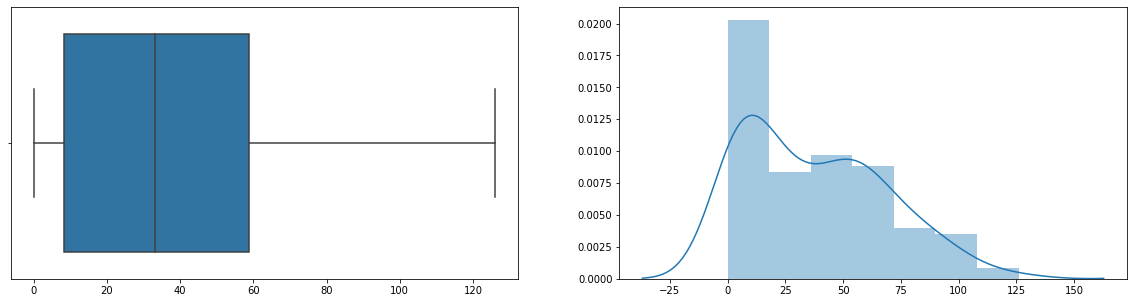

In [48]:
# #checking visually

fig, ax = plt.subplots(1,2, figsize=(20,5))


sns.boxplot(dw_runs, ax=ax[0]);
sns.distplot(dw_runs, ax=ax[1])

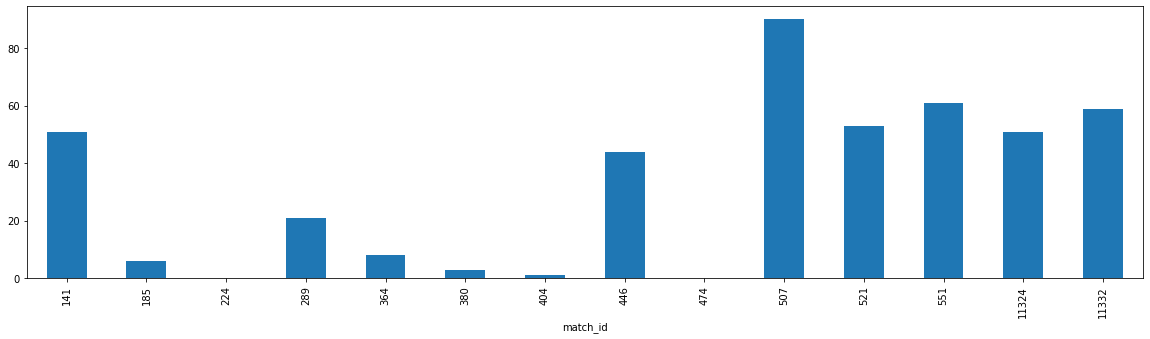

In [83]:
#checking how many runs rohit sharma scored each match between MI and DC

dw_bats = deliveries[deliveries['batsman']=='DA Warner']

#getting matches between RCB and KKR
dw_vs_csk = dw_bats[dw_bats.bowling_team =='Chennai Super Kings'].groupby('match_id')['batsman_runs'].sum()
dw_vs_csk.plot(kind='bar', figsize=(20,5))

In [86]:
dw_vs_csk.values.mean()
np.median(dw_vs_csk.values)

32.5

**Inference:**
    We can see that DA Warner has a good performance on an average agaianst CSK he has scores around 26-39's on average

# Q4. How many wickets will CSK loose in a match

In [54]:
cskb_srhf = deliveries[(deliveries.batting_team=='Chennai Super Kings')&(deliveries.bowling_team=='Sunrisers Hyderabad')]
cskb_srhf

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
19788,85,1,Chennai Super Kings,Sunrisers Hyderabad,1,1,PA Patel,SP Fleming,DP Vijaykumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19789,85,1,Chennai Super Kings,Sunrisers Hyderabad,1,2,PA Patel,SP Fleming,DP Vijaykumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19790,85,1,Chennai Super Kings,Sunrisers Hyderabad,1,3,PA Patel,SP Fleming,DP Vijaykumar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
19791,85,1,Chennai Super Kings,Sunrisers Hyderabad,1,4,PA Patel,SP Fleming,DP Vijaykumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19792,85,1,Chennai Super Kings,Sunrisers Hyderabad,1,5,PA Patel,SP Fleming,DP Vijaykumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19793,85,1,Chennai Super Kings,Sunrisers Hyderabad,1,6,PA Patel,SP Fleming,DP Vijaykumar,0,0,0,0,0,0,0,0,0,PA Patel,caught,RP Singh
19794,85,1,Chennai Super Kings,Sunrisers Hyderabad,2,1,S Anirudha,SP Fleming,RP Singh,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19795,85,1,Chennai Super Kings,Sunrisers Hyderabad,2,2,S Anirudha,SP Fleming,RP Singh,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19796,85,1,Chennai Super Kings,Sunrisers Hyderabad,2,3,S Anirudha,SP Fleming,RP Singh,0,0,0,4,0,0,0,4,4,NaN,NaN,NaN
19797,85,1,Chennai Super Kings,Sunrisers Hyderabad,2,4,S Anirudha,SP Fleming,RP Singh,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [69]:
totw_cskb_shf = cskb_srhf[cskb_srhf.player_dismissed.notnull()].groupby('match_id')['player_dismissed'].count()


totw_cskb_shf.values

print("Average:", totw_cskb_shf.values.mean())
print("Median:", np.median(totw_cskb_shf.values))
print("Min:", totw_cskb_shf.values.min())
print("Max:", totw_cskb_shf.values.max())

Average: 5.0
Median: 5.0
Min: 2
Max: 9


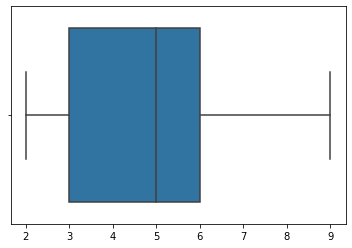

In [67]:
sns.boxplot(totw_cskb_shf.values)

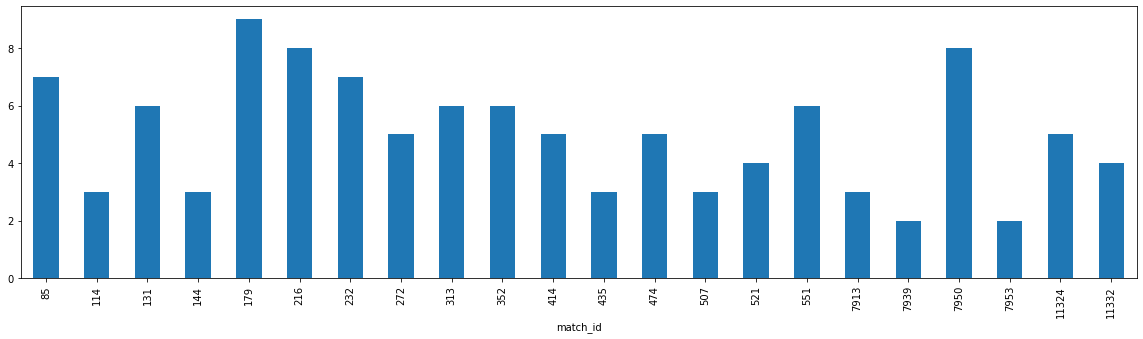

In [65]:
#checking visually
totw_cskb_shf.plot(kind='bar', figsize=(20,5))

**Inference:**
    - As per graph we can say say that usually CSK loses to SRH on an average by 3-5 wickets, and since SRH is in good form we can say they can take 6-8 wickets.
    

# Q5. How many runs will be scored totally in the match?


In [72]:
del_srh_csk = deliveries[((deliveries.batting_team=='Sunrisers Hyderabad')&(deliveries.bowling_team=='Chennai Super Kings'))|((deliveries.bowling_team=='Sunrisers Hyderabad')&(deliveries.batting_team=='Chennai Super Kings'))]
del_srh_csk

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
19788,85,1,Chennai Super Kings,Sunrisers Hyderabad,1,1,PA Patel,SP Fleming,DP Vijaykumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19789,85,1,Chennai Super Kings,Sunrisers Hyderabad,1,2,PA Patel,SP Fleming,DP Vijaykumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19790,85,1,Chennai Super Kings,Sunrisers Hyderabad,1,3,PA Patel,SP Fleming,DP Vijaykumar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
19791,85,1,Chennai Super Kings,Sunrisers Hyderabad,1,4,PA Patel,SP Fleming,DP Vijaykumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19792,85,1,Chennai Super Kings,Sunrisers Hyderabad,1,5,PA Patel,SP Fleming,DP Vijaykumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19793,85,1,Chennai Super Kings,Sunrisers Hyderabad,1,6,PA Patel,SP Fleming,DP Vijaykumar,0,0,0,0,0,0,0,0,0,PA Patel,caught,RP Singh
19794,85,1,Chennai Super Kings,Sunrisers Hyderabad,2,1,S Anirudha,SP Fleming,RP Singh,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19795,85,1,Chennai Super Kings,Sunrisers Hyderabad,2,2,S Anirudha,SP Fleming,RP Singh,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19796,85,1,Chennai Super Kings,Sunrisers Hyderabad,2,3,S Anirudha,SP Fleming,RP Singh,0,0,0,4,0,0,0,4,4,NaN,NaN,NaN
19797,85,1,Chennai Super Kings,Sunrisers Hyderabad,2,4,S Anirudha,SP Fleming,RP Singh,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [74]:
tot_runs_srh_csk = del_srh_csk.groupby('match_id')['total_runs'].sum()
tot_runs_srh_csk

match_id
85       292
114      295
131      334
144      278
179      349
216      277
232      246
272      311
313      312
352      310
414      319
435      369
474      291
507      374
521      373
551      362
7913     366
7939     373
7950     293
7953     373
11324    279
11332    364
Name: total_runs, dtype: int64

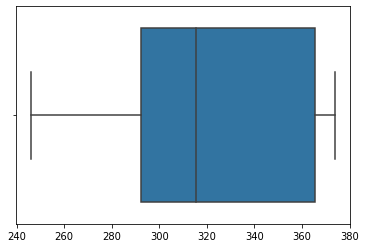

In [75]:
sns.boxplot(tot_runs_srh_csk.values)

In [76]:
print("Average:", tot_runs_srh_csk.values.mean())
print("Median:", np.median(tot_runs_srh_csk.values))
print("Min:", tot_runs_srh_csk.values.min())
print("Max:", tot_runs_srh_csk.values.max())

Average: 324.54545454545456
Median: 315.5
Min: 246
Max: 374


Text(0, 0.5, 'Total Runs')

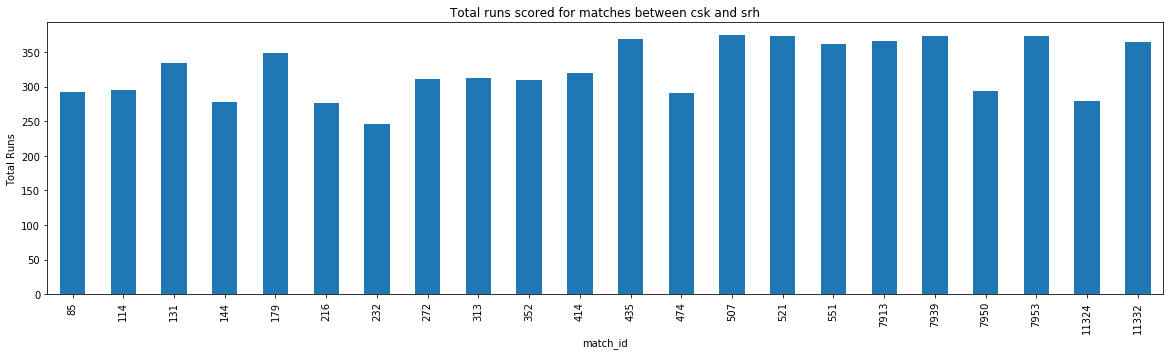

In [80]:
plt.title("Total runs scored for matches between csk and srh")
tot_runs_srh_csk.plot(kind='bar', figsize=(20,5))
plt.ylabel("Total Runs")


**Inference:**
    From the results we can say on an average both teams together will score around 320-340 runs. As per last few matches in 2019 scores did go slightly higher than 340 however most of the matched are aroung the 320 mark. And 2020 CSK is not in the greatest form whereas on the other hand SRH has been performing really well.
    
    Both the teams need a win so it is definitely going to be a tough one

In [ ]:
# but its 